
$\textbf{HERA Memo A. The Impact of Feed Positinal Displacement On the Delay Power Spectrum}$










$\textbf{Introduction}$

$\textbf{Section. 2.1 : Antenna Angular Response Model}$

The success of observing a faith 21CM cosmological signals emitted by Neutral Hydrogen atoms lies in the perfect characterization of its final destination i.e individual antenna element's signal chain. As the 21CM cosmological signals along with other radio signals lands on the $\textbf{antenna dish surface}$, the $\textbf{dish deformation}$ due gravity and strong winds, and roughness of the $\textbf{dish surface}$ slightly deviate their path away from the dish focus point, thus leading to path delays, $\textbf{multi-reflection}$ between the dish opposite sides, and/or feed-dish-vortex  multi-reflection and spillover to other adjacent antenna dish. These delays introduce ripples in delay spaces which are indistinguishable to 21CM cosmological signal (ref, impact of multi-reflection on the 21CM Delay power spectrum). In this work, we explore the $\textbf{impact of feed postional disorientation}$ on the instrument angular response and position errors and how these systemic affect the 21 cm power spectrum. In section 2.1, we discuss the impact of feed disorientation on the instrument angular response due strong wind and extreme temperature conditions. The visibility simulation are discussed in section 2.2.



$\textbf{Section. 2.1.1 : The effect of Feed Positional Displacemnt due to Strong Wind}$


Suppose a HERA-like antenna element, which has a feed cage hanged through spring-and-rope to four pole, see Figure 1 shows the cross-section.

![alt text](swind.png "Title")


The magnitude of force that is applied by the strong wind on the feed cage with surface area $\textbf{A}$ and a strong wind moving at speed $\mid \textbf{v}\mid =v$ and with a density $\rho$, is equal to:
\begin{equation}
    F_w= \frac{1}{2}\rho \textbf{A}v^2
\end{equation}

ref: https://www.engineeringtoolbox.com/wind-load-d_1775.html

But we also know that this force will cause compression or stretching of the springs that are holding the feed cage, the force is given by Hook's law,
\begin{equation}
    F_k= -k_{steel}\Delta l
\end{equation}
where $k_{steel}$ is the spring constant of a steel and $\Delta l$ is displacement cause by wind in lateral direction for one of the four spring hooked on feed cage. Equating the wind force and Hook's force, the displacement of feed position in one of spring hooked on the cage is equal to:
\begin{equation}
    \Delta l_w= -\frac{1}{2k_{steel}}\rho \textbf{A}v^2
\end{equation}

If the $h_{feed}^0$ is unpertabed height of a feed cage above the dish vertix, the lateral displacement of feed due strong wind will result in new  height, which is equal to:

\begin{equation}
    h_{feed}^w (k_{steel},\rho,A,v)= h_{feed}^0 + <\Delta l_w(k_{steel},\rho,A,v)>
\end{equation}
where $<\Delta l_w(k_{steel},\rho,A,v)>$ average of lateral displacement over sometime time $t$ .

$\textbf{Section. 2.1.2: The effect of Feed Positional Displacement due to Extreme Temperature}$

As discussed above, extreme where condition can affect the position of the feed and this can indirectly affect the primary antenna angular response.
In this section, we look at how does high temperature or low temperature results into feed positional displacement. Suppose the feed,the spring  and surroundings of the antenna are initially at thermal equalibruim with temperature $T_i$, now, if suppose that there is significant chnage in temperature of the surroundings, so that after some time, the new equalibrium temperature is $T_f$, then the spring will undergo a thermal expansion/shrinkage according the linear expansion formular,
\begin{equation}
    \Delta l_T= \alpha_{steel}l_0 (T_f-T_i)
\end{equation}
where $l_0$ is the orginal lenght of the string prior expansion/shrinkage and $\alpha_{steel}$ is the steel expansion coeffient. Again, this will affect the height of the feed cage in similar way as in the case of strong wind push. THe new height,

\begin{equation}
    h_{feed}^T (\alpha_{steel},T_i,T_f)= h_{feed}^0 + <\Delta l_T(\alpha_{steel},T_i,T_f)>
\end{equation}
where $<\Delta l_T(\alpha_{steel},T_i,T_f)>$ average of lateral displacement over sometime time $t$ 


$\textbf{The Impact of Feed Positional Disorientation on Angular Response}$

Suppose a parabolic dish is place at the $xy-plane$ such that the vertex of the dish coincide with the $xy-plane$ origin, with a focus lenghth $y_0$ above the origin and the shape of the dish is give by $y= \frac{x^2}{4h_{feed}^0}$. The total path traveled by a light ray from height $h_{far}$ (far field distance $h=2\frac{D^2}{\lambda}$) straight above the dish ($\theta=0^o$, reflecting from the dish surface at point $P(x,y)$ to focus at $F(0,h_{feed}(dx,dy))$ is
 \begin{equation}
    L_{Total}= xsin(\theta) -ycos(\theta) + h_{far} + \sqrt{ x^2 + (h_{feed}(dh_x,dh_y) -y)^2}
\end{equation}

$h_{feed}(dh_x,dh_y) =\sqrt{dh_{x}^2 + (h_{feed}^0 +dh_y)^2}

where $dh_x$ and $dh_y$  are feed positional displacwith displaced a dish focal length given by Equation descibe above.
. The instrument response model for antenna $i$ with a dish diameter $D$ observing at frequency $\nu$ is
\begin{equation}
    A_i(\theta,\lambda,dh_x,dh_y) = \frac{\mid E(\theta,\lambda,dh_x,dh_y)\mid^2}{Z_0}
\end{equation}
where is characteristic impedance of free space, $Z_0=377$ ohm. The electric field intensity measured at co-altitude angle $\theta$ is
\begin{equation}
    E(\theta,\lambda,dh_x,dh_y)=  2\int_{0}^{D/2}\epsilon_0 e^{i\frac{2\pi}{\lambda}L_{Total}(x,y,\lambda,dh_x,dh_y)}\sqrt{1+ \Big(\frac{x}{4h_{feed}^0}\Big)^2}dx
\end{equation}
 .
 

$\textbf{The Electric Field at Focus as function of Lateral Positional Displacement for a Source at Zenith}$

In [1]:
from scipy.optimize import fmin_cg
import numpy as np
import matplotlib.pyplot as plt
import time
import get_ants_response
from scipy.integrate import quad as qd

#the feed displacement due to wind

#4.9~29.4 N/mm
#4.9~29.4 x10^3 N/m
#air density NC 1.18 kg/m^3 at 20 C
#HERA feed cage is made  of  cylinder 176 cm diameter and hieght of 36 cm,
#A = 2pi*r*h
def get_dl_wind(vwind,r_cage,h_cage,rho=1.18,k_steel =29.4e3):
    "This function compute the letaral displacement of feed cage due to strong wind"
    Feed_surfarea = 2.0*np.pi*r_cage*h_cage
    dl_wind = -(1/(2*k_steel))*(Feed_surfarea/2)*rho*vwind**2
    return dl_wind

# 1kt =0.514444 m/s
#9kt = x
#x =0.514444*9

vwind = 4.63 #m/s


print abs(get_dl_wind(4.63,17.6/2.0,0.36))



0.00428155679056


Text(0,0.5,'Total Electric Field at Focus [V/m]')

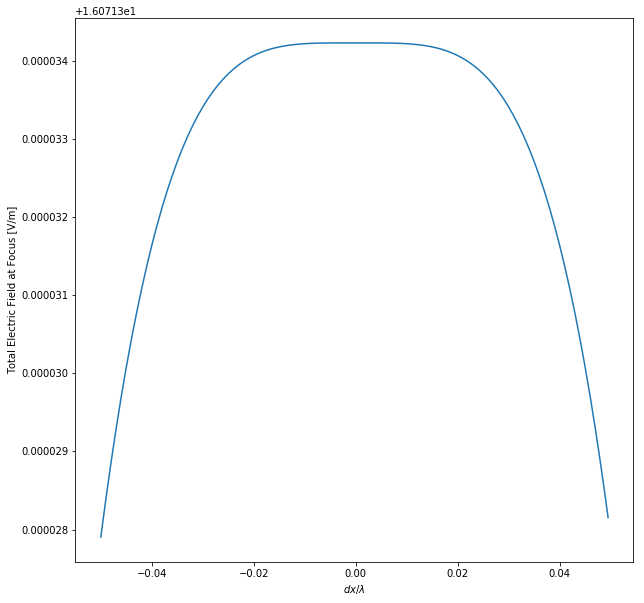

In [71]:
#the impact of feed positional displacement on the total power received at the focus
#the signal coming right above the feed, zenith


dy = np.arange(-0.1,0.1,0.001)
dx = np.arange(-0.1,0.1,0.001)

D= 14.6 #meters HERA dish diameter
lambda_= 3e8/(150*10**6)  #meters

    

h_f = 2.0*D**2/lambda_ #farfield distance
h_0 = 4.5 # HERA dish feed height
y = lambda x : x**2/4.0/h_0 #dish surface
    
#focus dispacement
df = lambda dy,dx :np.sqrt((h_0 +dy)**2 + dx**2)
#total path travelled by a planewave from a source at far-field to the focal point
tot_path = lambda x,theta,dy,dx : abs(np.sin(theta)*x - np.cos(theta)*y(x) + h) + np.sqrt(x**2 + (df(dy,dx)- y(x))**2)

exp_ = lambda x,theta,dy,dx : np.exp(1j*2.0*(np.pi/lambda_)*tot_path(x,theta,dy,dx))

real_int = lambda x,theta,dy,dx : exp_(x,theta,dy,dx).real*np.sqrt(1.0 + (x/(2.0*h_0))**2)
imag_int = lambda x,theta,dy,dx : exp_(x,theta,dy,dx).imag*np.sqrt(1.0 + (x/(2.*h_0))**2)

h= h_f

power =[]
m = 0.0
tot_EF_at_Focus_xdir =[2.0*(qd(real_int,0.0,D/2,args=(m,0.0,dx[i]))[0] + 1j*qd(imag_int,0.0,D/2,args=(m,0.0,dx[i]))[0]) for i in range(dx.size)]


plt.figure(figsize=(10,10))
#plt.title('Total Electric Field at Focus for Lateral Feed Displacement')
plt.plot(dx/lambda_,np.abs(tot_EF_at_Focus_xdir))
plt.xlabel(r'$dx/\lambda$')
plt.ylabel('Total Electric Field at Focus [V/m]')



The total electric at the feed point is independent of lateral displacement for $\mid dy/\lambda \mid \leq 0.02$ and start to decrease quadratical. The asymmetric shape that we observe on the plot can be as result of the amount of full wave available as move toward/way from  dish vertex. For example, observing at 150 MHz, with correspoinding wavelenght of 2 meters, for a HERS-like dish with a feed at 4.5 metters above the dish vertex, there can be  a maximum  of 2.5 waves can be formed between the dish surface and the feed point. So that as the total electric you receive will decrease more drastically as move the feed toward the dish vertex than moving it way. This is becuase you have relatively more waves as you away from the dish vertex.

2.0

$\textbf{The Electric Field at Focus as function of Axial Positional Displacement for a Source at Zenith}$

Text(0,0.5,'Total Electric Field at Focus [V/m]')

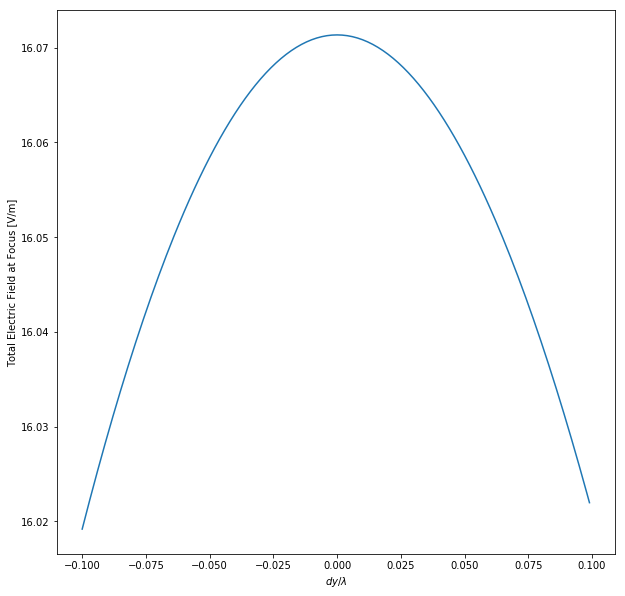

In [50]:
m= 0.0
tot_EF_at_Focus_ydir =[qd(real_int,-D/2.0,D/2.0,args=(m,dy[i],0.0))[0] + 1j*qd(imag_int,-D/2.0,D/2.0,args=(m,dy[i],0.0))[0] for i in range(dy.size)]


plt.figure(figsize=(10,10))
#plt.title('Total Electric Field at Focus for Axial Feed Displacement')
plt.plot(dy,np.abs(tot_EF_at_Focus_ydir))
plt.xlabel(r'$dy/\lambda$')
plt.ylabel('Total Electric Field at Focus [V/m]')


The total electric at the feed point is decrease squadratical as the feed displacement increase from both directions. However, there  is asymmetric shape in the plot of total electric at the feed point vs feed positional displacement as obseverved previously observed in lateral feed positional dsiplacement. This asymmetry is understood from the same reasoning discussed above.

$\textbf{The Electric Field at Focus as function of Lateral Positional Displacement for a Source at Off-Zenith}$

In [30]:
dish_res = 2.0/14.0
dish_res, 'radians', np.rad2deg(dish_res) ,'degrees'

(0.14285714285714285, 'radians', 8.18511135901176, 'degrees')

Text(0,0.5,'Total Electric Field at Focus [V/m]')

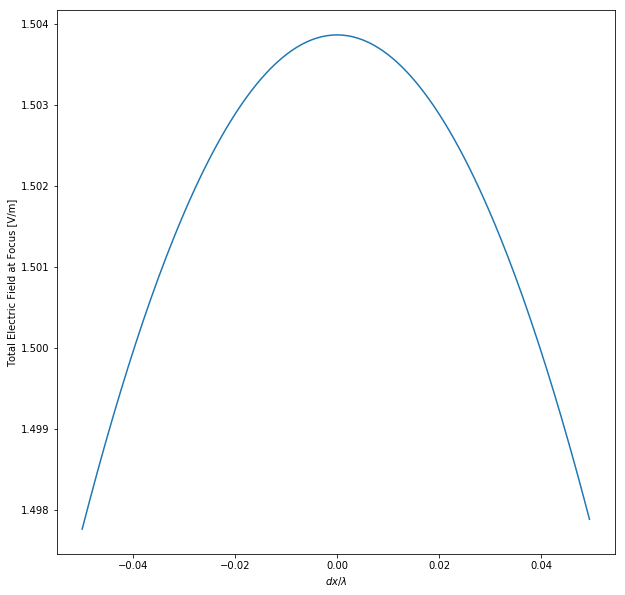

In [72]:
m = 2.0*dish_res
dish_res
tot_EF_at_Focus_xdir =[2.0*(qd(real_int,0.0,D/2,args=(m,0.0,dx[i]))[0] + 1j*qd(imag_int,0.0,D/2,args=(m,0.0,dx[i]))[0]) for i in range(dx.size)]


plt.figure(figsize=(10,10))
#plt.title('Total Electric Field at Focus for Lateral Feed Displacement')
plt.plot(dx/lambda_,np.abs(tot_EF_at_Focus_xdir))
plt.xlabel(r'$dx/\lambda$')
plt.ylabel('Total Electric Field at Focus [V/m]')


The general shape of the total electric field  at feed point is preserved even for the case of waves coming o from the off-set from the zenith.This could be the fact that the lateral movement always see the same amplitude of the incomming waves. However, the strenght of the droped by a factor of roughly 10, and the previous observed flatness within $\mid dy/\lambda \mid \leq 0.02$ is not observed.

$\textbf{The Electric Field at Focus as function of Axial Positional Displacement for a Source Off-Zenith}$

Text(0,0.5,'Total Electric Field at Focus [V/m]')

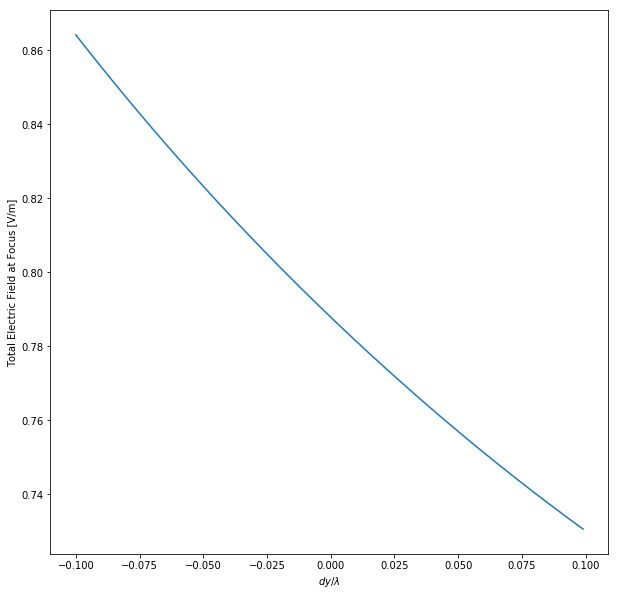

In [73]:
tot_EF_at_Focus_ydir =[qd(real_int,-D/2.0,D/2.0,args=(m,dy[i],0.0))[0] + 1j*qd(imag_int,-D/2.0,D/2.0,args=(m,dy[i],0.0))[0] for i in range(dy.size)]


plt.figure(figsize=(10,10))
#plt.title('Total Electric Field at Focus for Axial Feed Displacement')
plt.plot(dy,np.abs(tot_EF_at_Focus_ydir))
plt.xlabel(r'$dy/\lambda$')
plt.ylabel('Total Electric Field at Focus [V/m]')

The total electric field  at feed point exhibit a negative linear trend, and the total strenght of the  total electric field  at feed point  droped by a factor of roughly 10.  One could image waves coming at angle, if the feed point is moved up, it will see less waves. Where else if the feed is move inwards, it will see more upto an  shadow angle. This will results in an almost linearly decreasing trend.

$\textbf{Antenna Angular Response without Feed Positional Displacement}$

Text(0,0.5,'dB')

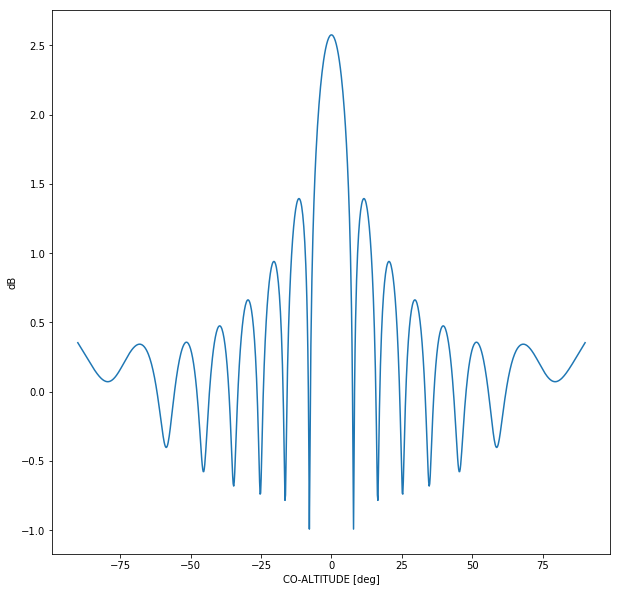

In [44]:
#Antenna angular Response 
D_hera= 14.0 # HERA dish diameter in meters
h_feed = 4.5 # HERA feed height in meters
freq_mid = 150.0 # HERA mid frequency in MHz
dx =0.0 #lateral positional displacement in meters
dy =0.0 # axial positional displacemt in meters


theta = np.linspace(-np.pi/2,np.pi/2,1000) # zenith angle in radians
ant_resp_stong_winds_wto_feed_errors = get_ants_response.response_pattern(theta,D_hera,h_feed,freq_mid,dy,dx)[1]



#plot of  normalize power pattern in dB

plt.figure(figsize=(10,10))
plt.plot(np.rad2deg(theta),np.log10(ant_resp_stong_winds_wto_feed_errors))
plt.xlabel('CO-ALTITUDE [deg]')
plt.ylabel('dB')


Text(0,0.5,'dB')

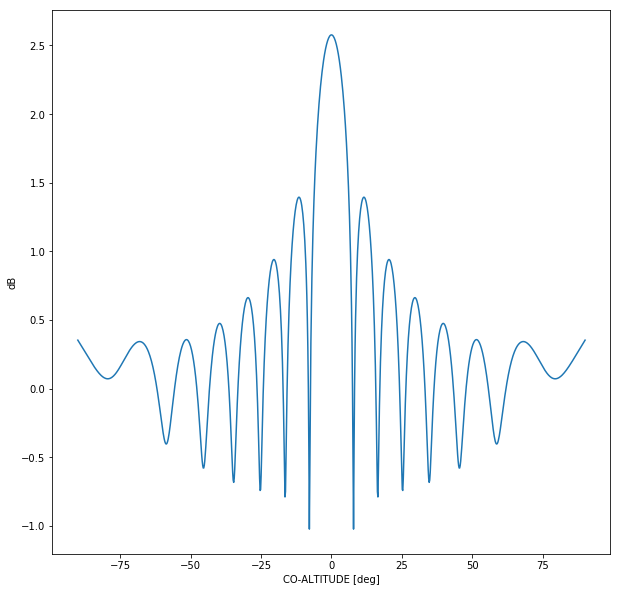

In [69]:
#the feed posotion precision is +/-1 0.02m
#fp = 0.020m +/- 0.004

dy = 0.0 #np.random.normal(0.0,4.5)
dx = 0.1 #4.5 #np.random.normal(0.0,0.4.54)
theta = np.linspace(-np.pi/2,np.pi/2,1000)
ant_resp_stong_winds_wt_feed_errors = get_ants_response.response_pattern(theta,D_hera,h_feed,freq_mid,dy,dx)[1]

#test response pattern

plt.figure(figsize=(10,10))
plt.plot(np.rad2deg(theta),np.log10(ant_resp_stong_winds_wt_feed_errors))
plt.xlabel('CO-ALTITUDE [deg]')
plt.ylabel('dB')

Text(0,0.5,'dB')

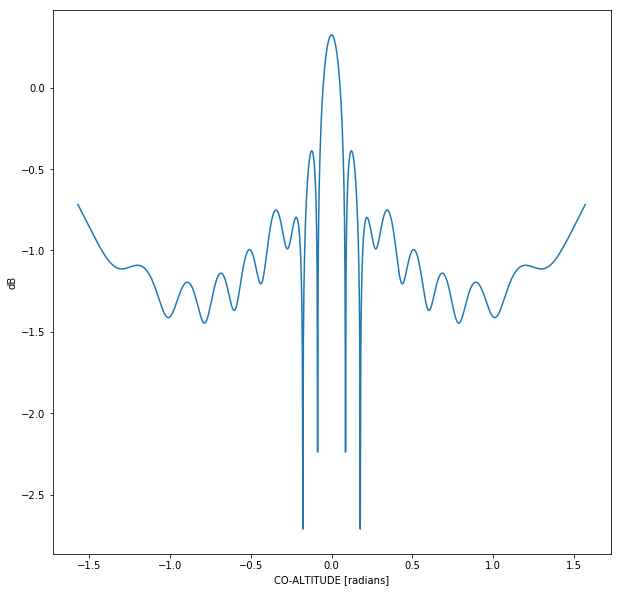

In [64]:
#Antenna normalized power residuals

res = np.array(ant_resp_stong_winds_wt_feed_errors) - np.array(ant_resp_stong_winds_wto_feed_errors)




plt.figure(figsize=(10,10))
plt.plot(theta,np.log10(res))
plt.xlabel('CO-ALTITUDE [radians]')
plt.ylabel('dB')


('first null at 150 MHz is', 7.792226013779197)


Text(0,0.5,'dB')

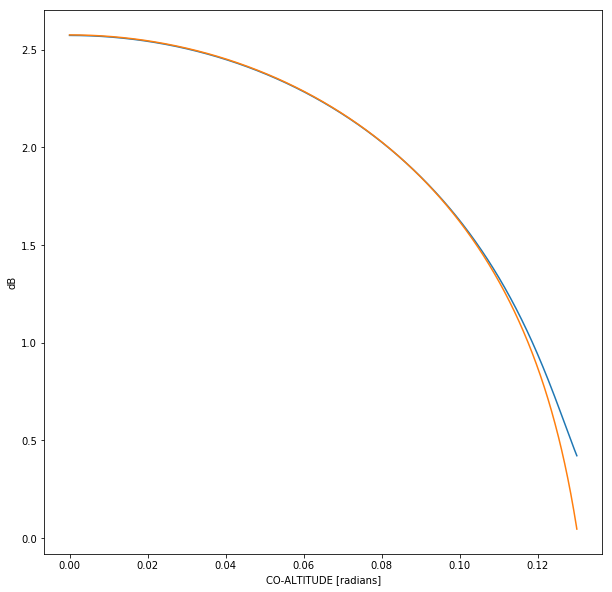

In [67]:
theta_main =np.linspace(0.0,0.13,1000)

dy = np.arange(-0.10,0.10,0.1)

print("first null at 150 MHz is", np.rad2deg(0.136))


plt.figure(figsize=(10,10))
for i in range(dy.size):
        main_beam = np.array(get_ants_response.response_pattern(theta_main,D_hera,h_feed,freq_mid,dy[i],0.0)[1])
        
       # print np.real(main_beam)
    
        plt.plot(theta_main,np.log10(np.real(main_beam)))
        
        
        
plt.xlabel('CO-ALTITUDE [radians]')
plt.ylabel('dB')


$\textbf{The Impact of Feed positional Displacement on the Beam Solid Angle. }$

In [23]:
# Beam effeciency at 150 MHz

# Beam efficiency solid angle

def beam_efficiency(theta,theta_main,dx,dy,freq):
    
    """his function calcuate the  main beam solid angle given the theta (zenith angle i radians), feed positional 
     displacement in dx and dy (meters) and the observing frequency in MHz. 
    """
    #main beam solid angle as function of dx and dy
    npower_mbeam_ydir = [np.abs(get_ants_response.response_pattern(theta_main,D_hera,h_feed,freq_mid,dy[i],0.0)[1]) for i in range(dy.size)]
    omega_mbeam_ydir = [np.sum(2.0*np.pi*np.array(npower_mbeam_ydir[i])*np.sin(theta_main)) for i in range(len(npower_mbeam_ydir))]
    npower_mbeam_xdir = [np.abs(get_ants_response.response_pattern(theta_main,D_hera,h_feed,freq_mid,0.0,dx[i])[1]) for i in range(dx.size)]
    omega_mbeam_xdir = [np.sum(2.0*np.pi*np.array(npower_mbeam_xdir[i])*np.sin(theta_main)) for i in range(len(npower_mbeam_xdir))]
    
    #total beam solid angle as function of dx and dy
    npower_beam_ydir = [np.abs(get_ants_response.response_pattern(theta,D_hera,h_feed,freq_mid,dy[i],0.0)[1]) for i in range(dy.size)]
    omega_beam_ydir = [np.sum(2.0*np.pi*np.array(npower_beam_ydir[i])*np.sin(theta)) for i in range(len(npower_beam_ydir))]
    npower_beam_xdir = [np.abs(get_ants_response.response_pattern(theta,D_hera,h_feed,freq_mid,0.0,dx[i])[1]) for i in range(dx.size)]
    omega_beam_xdir = [np.sum(2.0*np.pi*np.array(npower_beam_xdir[i])*np.sin(theta)) for i in range(len(npower_beam_xdir))]   
    beam_effic_ydir = np.array(omega_mbeam_ydir)/np.array(omega_beam_ydir)
    beam_effic_xdir = np.array(omega_mbeam_xdir)/np.array(omega_beam_xdir)
    
    return [omega_mbeam_ydir,omega_beam_ydir,beam_effic_ydir,omega_mbeam_xdir,omega_beam_xdir,beam_effic_xdir]



theta = np.linspace(0.0,np.pi,1000)
dy = np.arange(-0.10,0.10,0.01)
dx = np.arange(-0.10,0.10,0.01)


beam_data = beam_efficiency(theta,theta_main,dx,dy,150)

    
    

Text(0,0.5,'$\\Omega_{MB}$ $[sr]$')

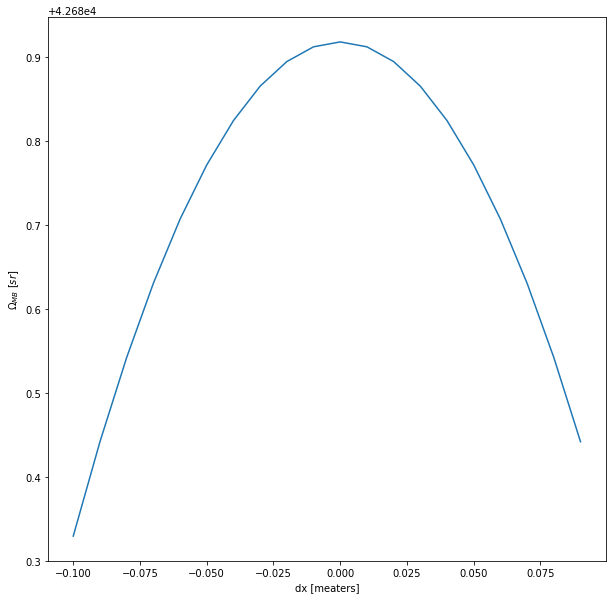

In [29]:
#The main beam solid angle as function of dx

plt.figure(figsize=(10,10))
plt.plot(dx,beam_data[3])
plt.xlabel('dx [meaters]')
plt.ylabel(r'$\Omega_{MB}$ $[sr]$')



Text(0,0.5,'$\\Omega_{A}$ $[sr]$')

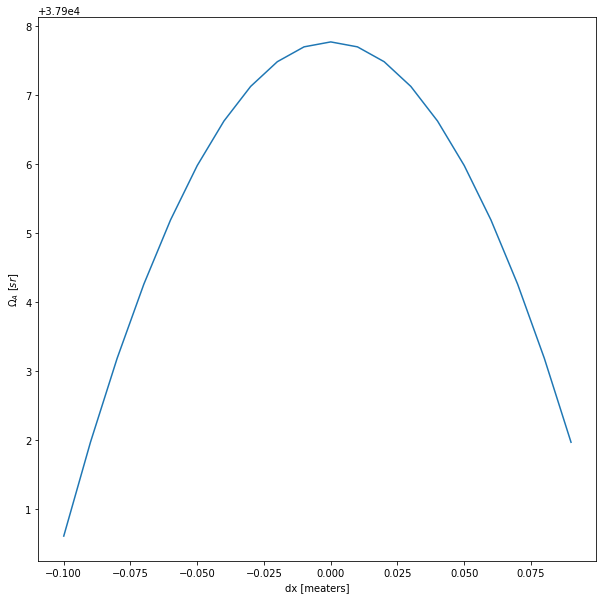

In [30]:
# The total solid angle as function of dx

plt.figure(figsize=(10,10))
plt.plot(dx,beam_data[4])
plt.xlabel('dx [meaters]')
plt.ylabel(r'$\Omega_{A}$ $[sr]$')


Text(0,0.5,'$\\Omega_{MB}$ $[sr]$')

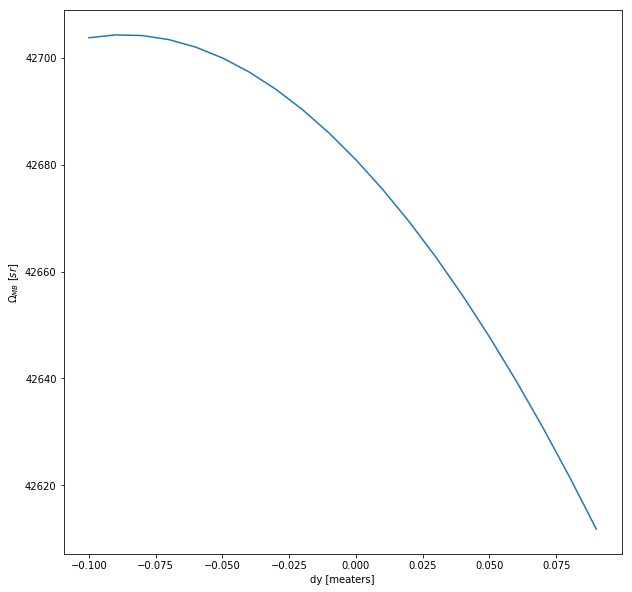

In [38]:

# The main beam solid angle as function of dy

plt.figure(figsize=(10,10))
plt.plot(dy,beam_data[0])
plt.xlabel('dy [meaters]')
plt.ylabel(r'$\Omega_{MB}$ $[sr]$')


Text(0,0.5,'$\\Omega_{A}$ $[sr]$')

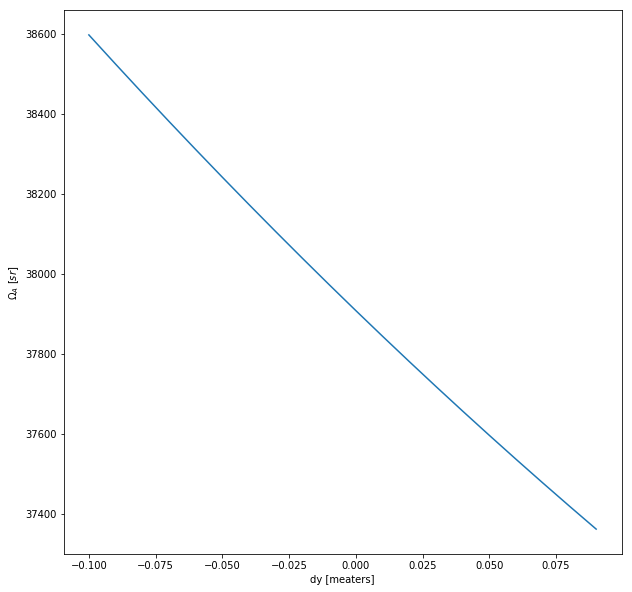

In [39]:
plt.figure(figsize=(10,10))
plt.plot(dy,beam_data[1])
plt.xlabel('dy [meaters]')
plt.ylabel(r'$\Omega_{A}$ $[sr]$')

$\textbf{Lessons of the Analsis}$


1. We observed that the total electric at feed point for the lateral positional displacement  decrease quadratically with the increase of displacement in both negative and positive directions. However, it decrease fast in a negative direction, and thus, resulting into asymmetric shape. And it remain constant for the displacements with 20% wavelength at 150 MHz for a waves coming from the source at zenith. The general strength of the total electric field at feed point decrease by about a factor of 10.

2. In the case of axial displacement, the total electric field at feed point exhibit a similar trend as lateral displacement. However, it doesn't have a flat shape at for displacements within 20% of observing wavelength at 150 MHz for waves coming from the source at zenith. In case of source coming from offset from zenith, an almost negative linear trend is observed. This is interpreted to be as results of transverse movement against an incoming wave i.e if the feed is moved inwards, it will see more waves, and hence, increase the total electric field at feed point. However, in general, the strength of the total electric field  drop about a factor of 10.

3. To quantify the impact of the feed positional displacement on to an antenna angular response, we compute the main beam solid angle and the total beam solid angle  as function of feed positional displacement. A similar trend is observed as in the case of the total electric field at feed point as shown in the previous analysis.

4. Further, it is noted that the feed positional displacement affect the shape and size of main beam, and thus, increase the sideloops. This will impact the antenna resolution, and therefore, results in beam errors. This has potential of causing antenna-antenna angular response variations, and eventually, results in calibration errors. And it can also affect the imaging process if a correction beam model is not used in deconvolution step.

